In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [19]:
activations = {
    'sigmoid': (sigmoid, sigmoid_derivative),
    'tanh': (tanh, tanh_derivative),
    'relu': (relu, relu_derivative)
}

In [20]:
# Input data: {[0,0], [0,1], [1,0], [1,1]}
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Targets for AND, OR, XOR gates
y_and = np.array([0, 0, 0, 1])    # Linearly separable
y_or = np.array([0, 1, 1, 1])     # Linearly separable
y_xor = np.array([0, 1, 1, 0])    # Not linearly separable

datasets = {'AND': y_and, 'OR': y_or, 'XOR': y_xor}

In [21]:
def train_perceptron(X, y, activation, activation_derivative, bias=True, lr=0.1, epochs=1000):
    np.random.seed(0)
    w = np.random.randn(2)  # Weights for 2 inputs
    b = np.random.randn(1) if bias else 0  # Bias term or 0
    losses = []
    
    for epoch in range(epochs):
        z = X @ w + b
        a = activation(z)
        loss = np.mean((a - y)**2)  # Mean Squared Error
        losses.append(loss)
        
        # Gradient computation
        error = (a - y) * activation_derivative(z)
        dw = X.T @ error / len(y)
        db = np.sum(error) / len(y) if bias else 0
        
        # Update weights
        w -= lr * dw
        if bias:
            b -= lr * db
    
    return w, b, losses

In [22]:
def plot_decision_boundary(X, y, w, b, activation, title, threshold=0.5):
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = np.linspace(-0.5, 1.5, 100)
    xx1, xx2 = np.meshgrid(x1, x2)
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    
    z = grid @ w + b
    a = activation(z)
    pred = (a > threshold).astype(int).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, pred, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

Task 1a: Single Layer Perceptron


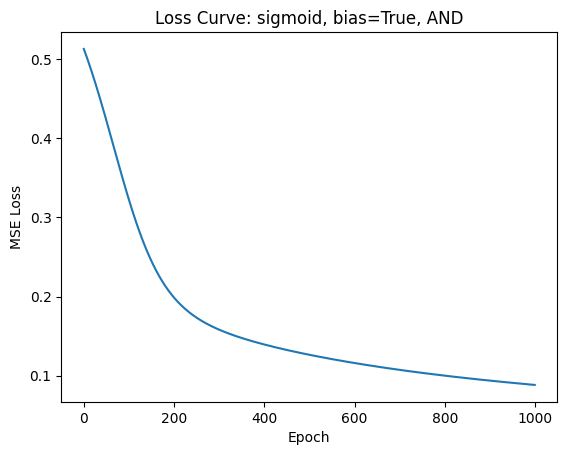

sigmoid, bias=True, AND, Accuracy=1.00


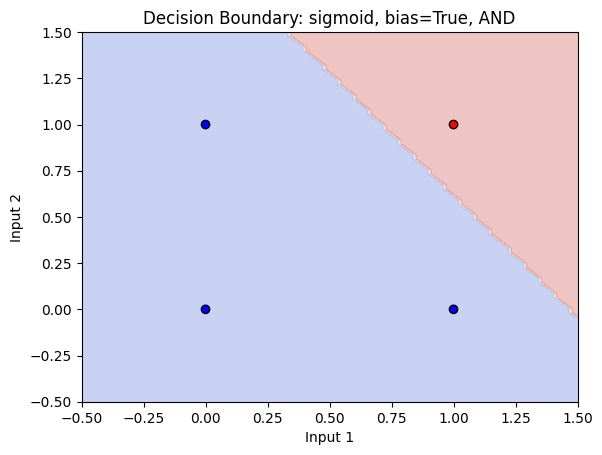

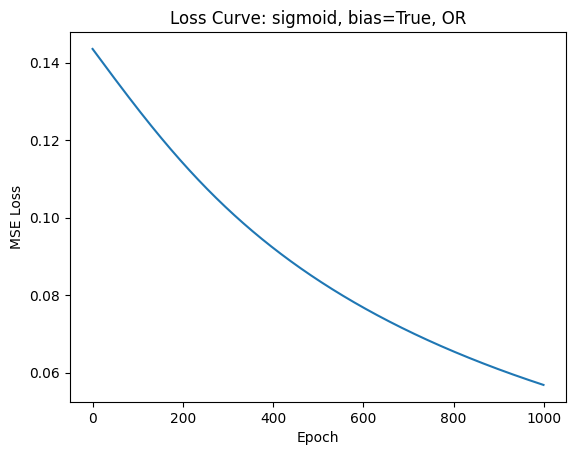

sigmoid, bias=True, OR, Accuracy=1.00


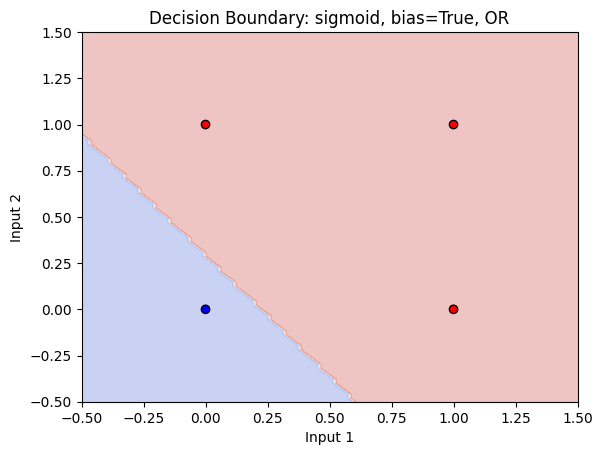

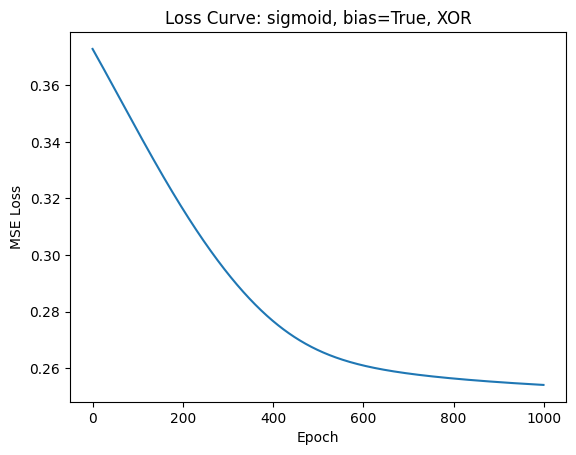

sigmoid, bias=True, XOR, Accuracy=0.50


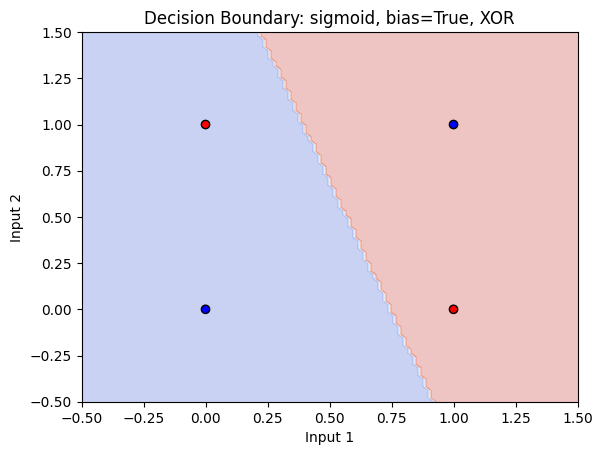

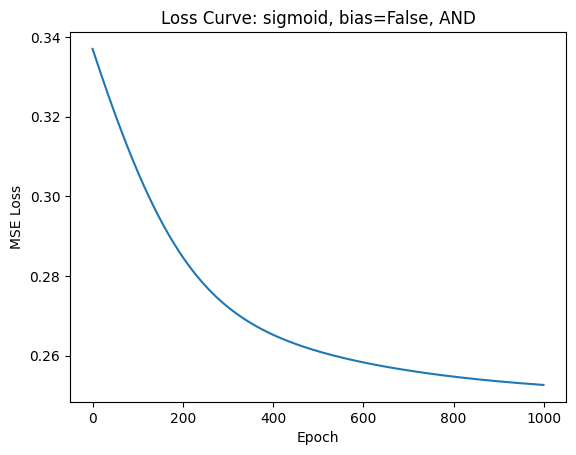

sigmoid, bias=False, AND, Accuracy=0.75


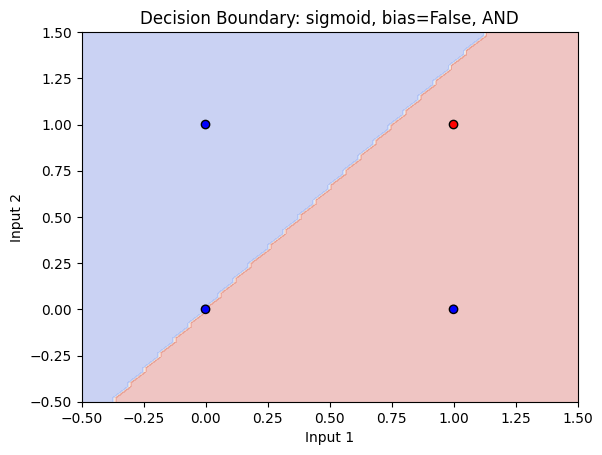

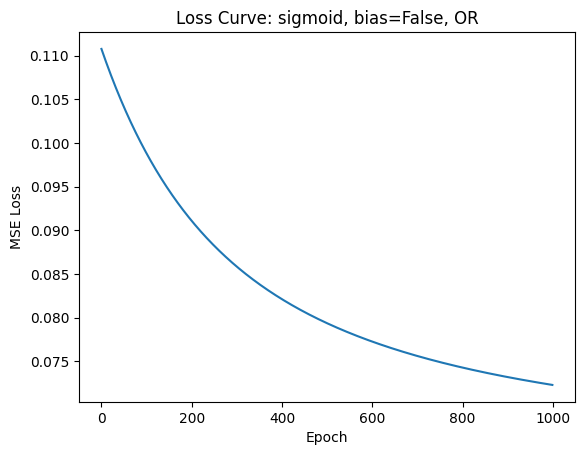

sigmoid, bias=False, OR, Accuracy=1.00


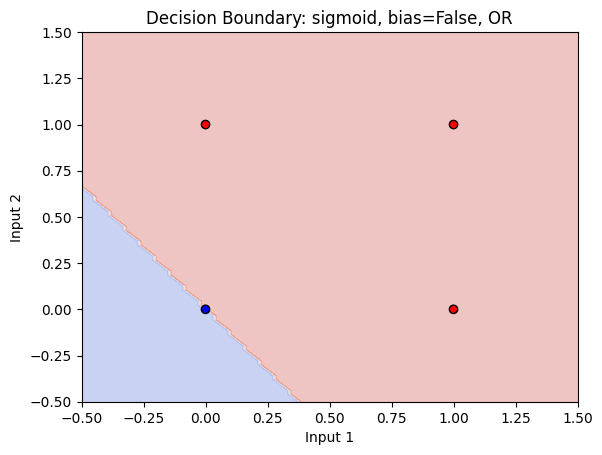

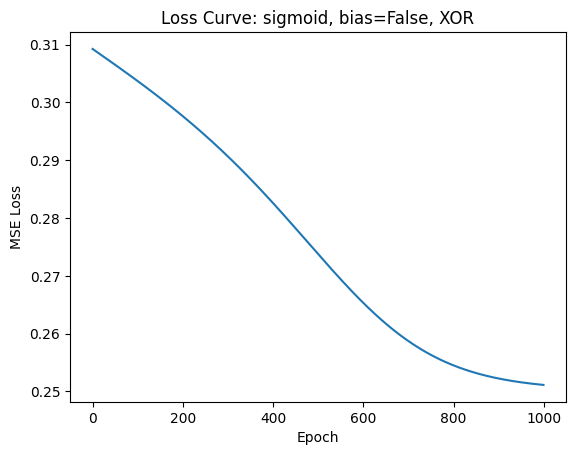

sigmoid, bias=False, XOR, Accuracy=0.50


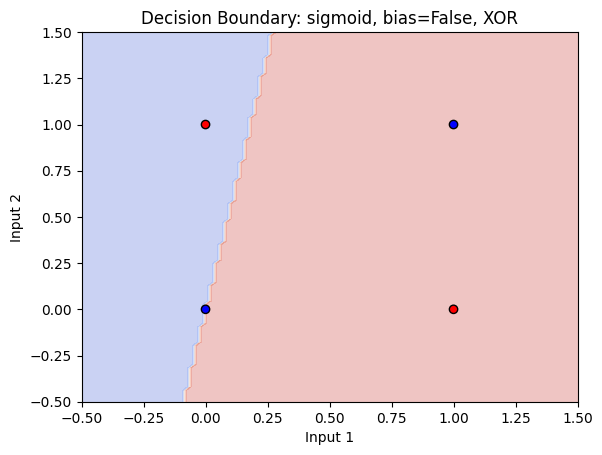

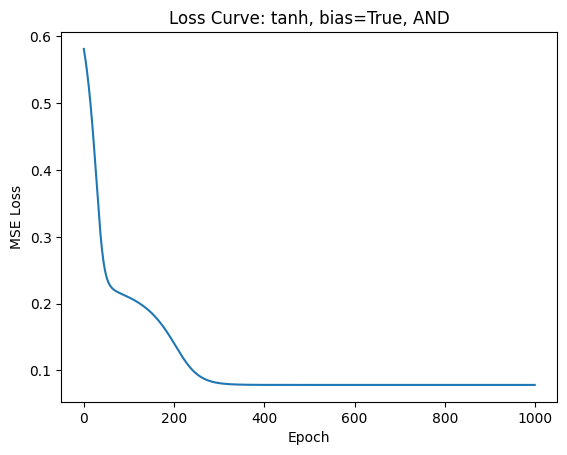

tanh, bias=True, AND, Accuracy=1.00


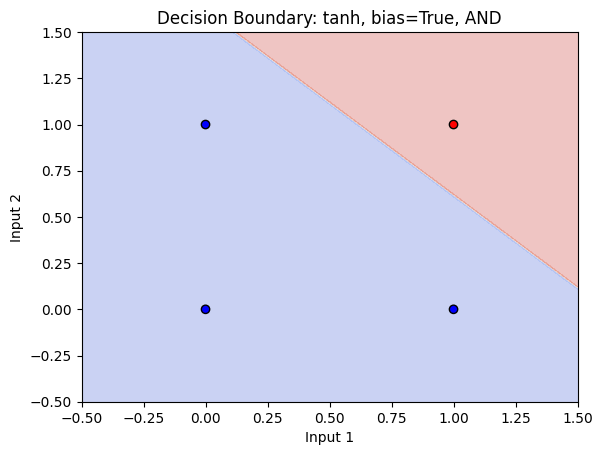

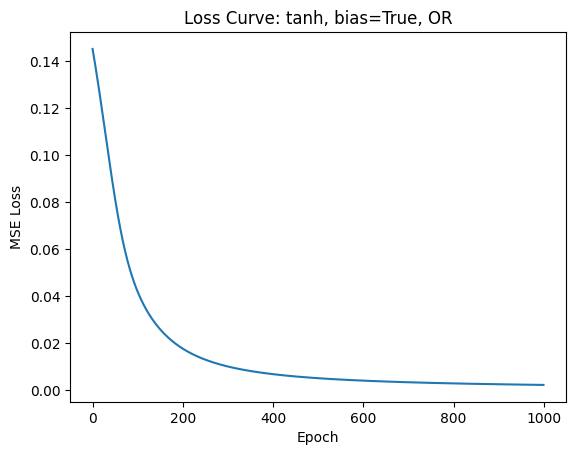

tanh, bias=True, OR, Accuracy=1.00


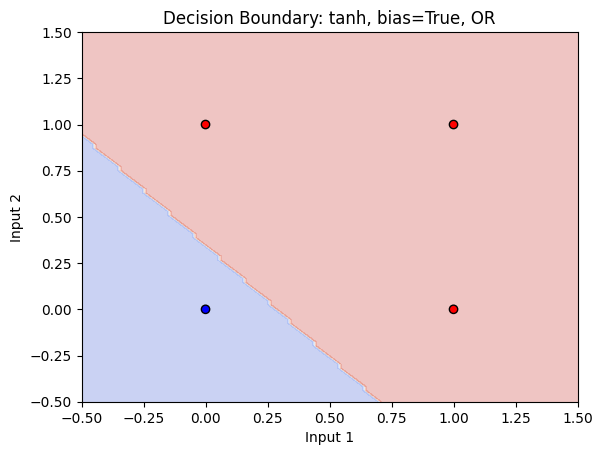

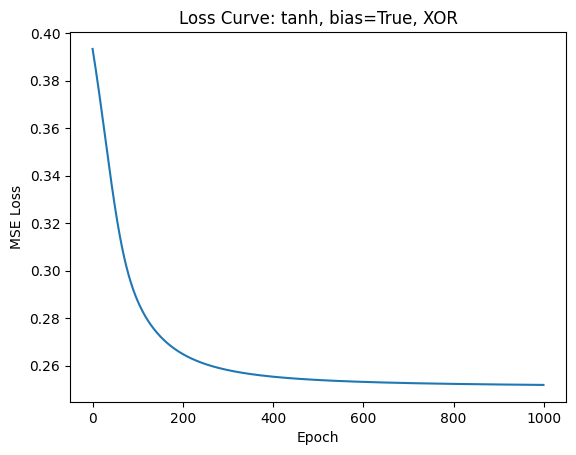

tanh, bias=True, XOR, Accuracy=0.75


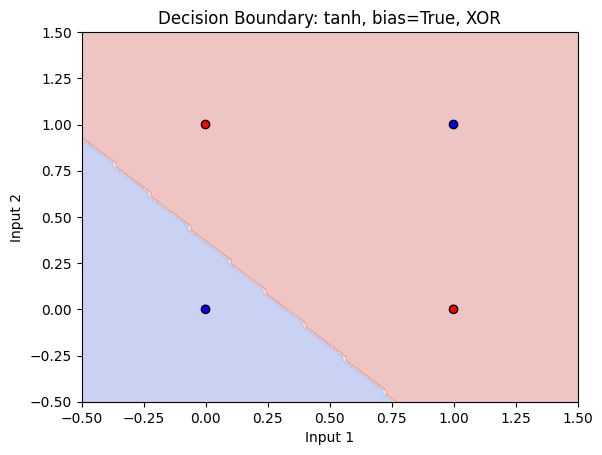

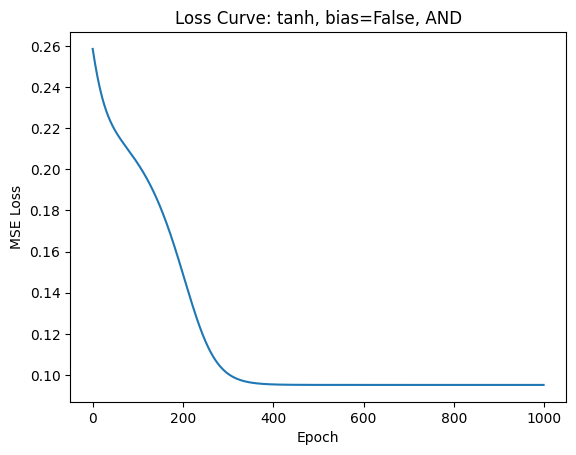

tanh, bias=False, AND, Accuracy=1.00


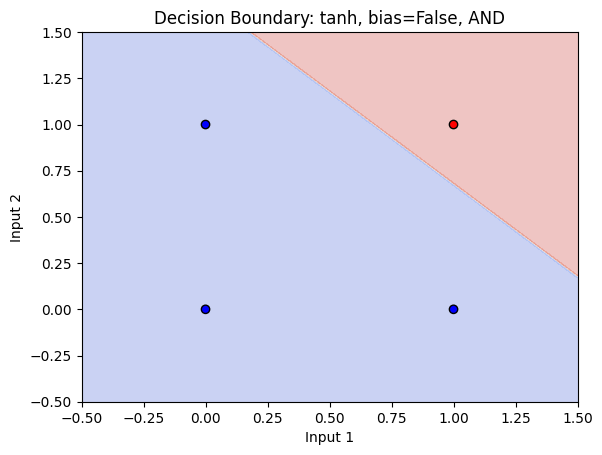

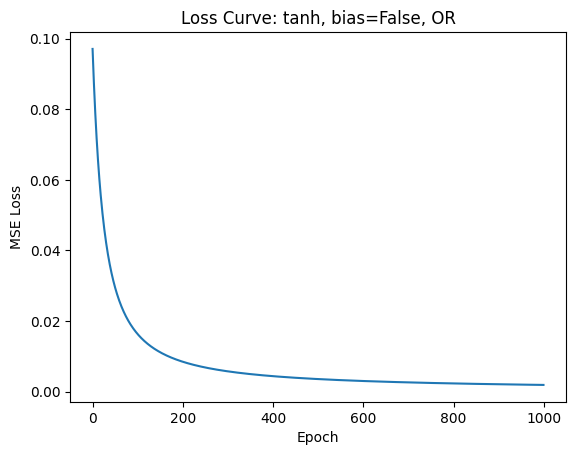

tanh, bias=False, OR, Accuracy=1.00


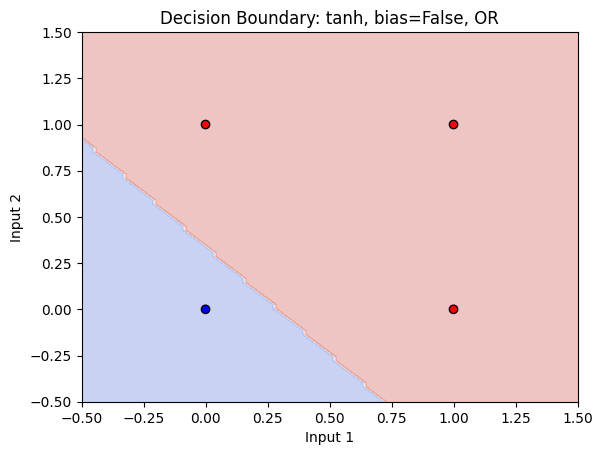

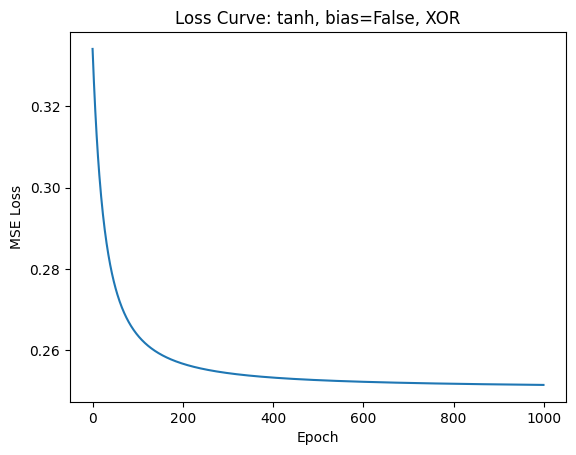

tanh, bias=False, XOR, Accuracy=0.75


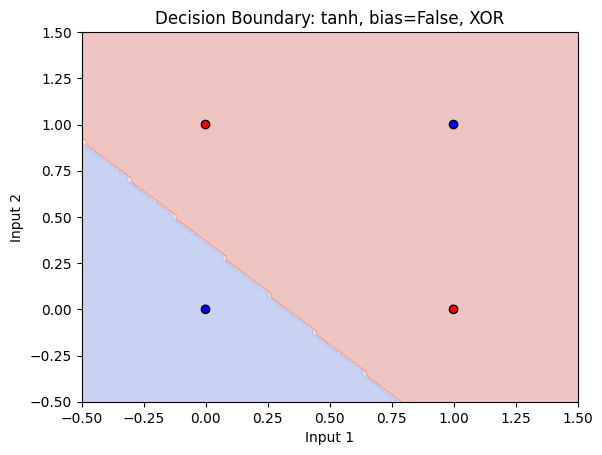

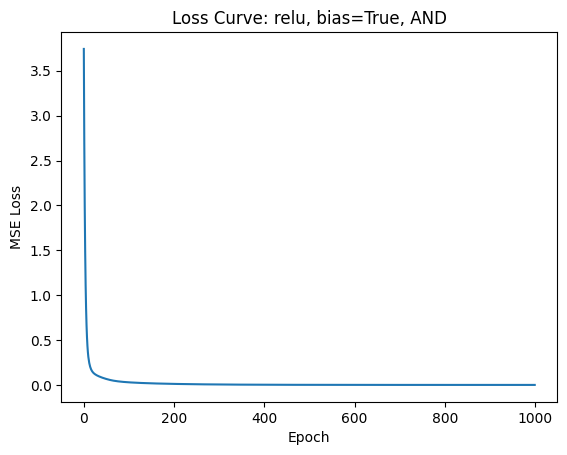

relu, bias=True, AND, Accuracy=1.00


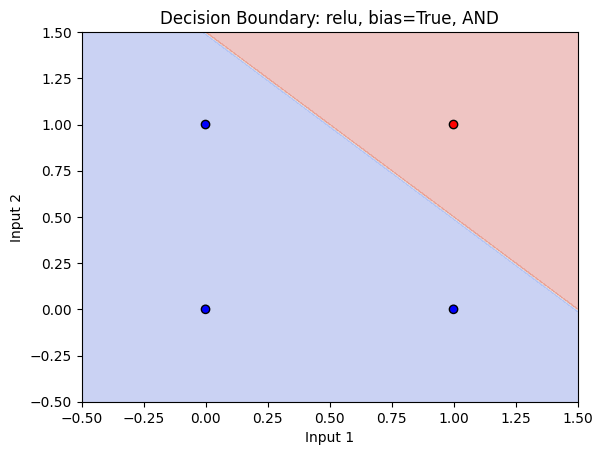

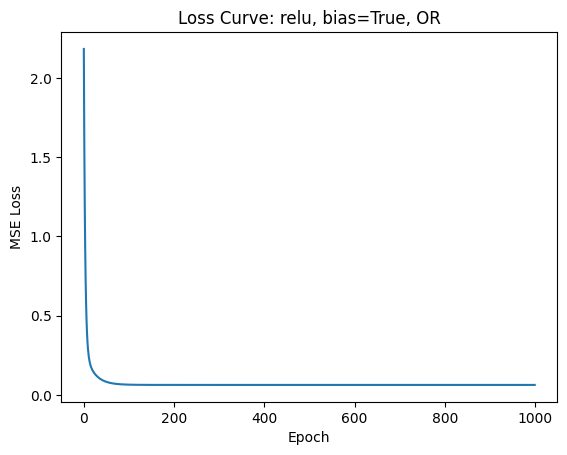

relu, bias=True, OR, Accuracy=1.00


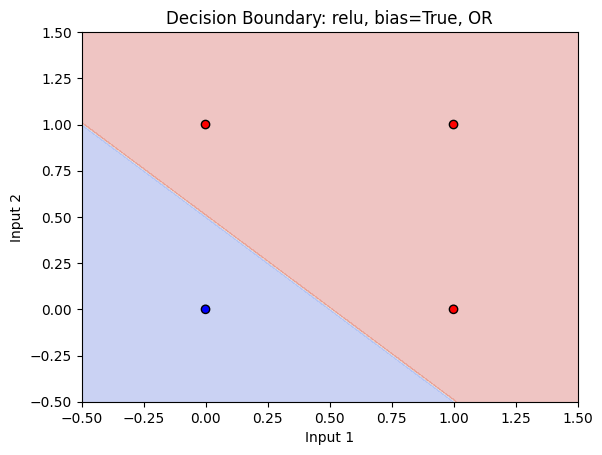

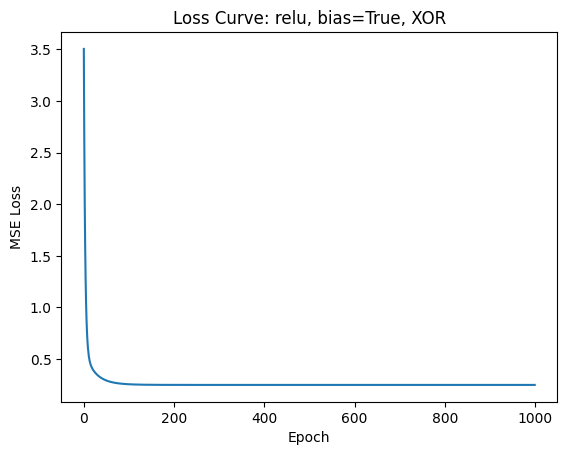

relu, bias=True, XOR, Accuracy=0.25


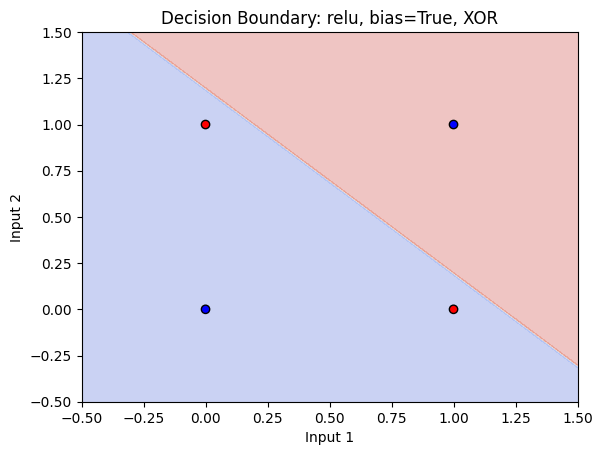

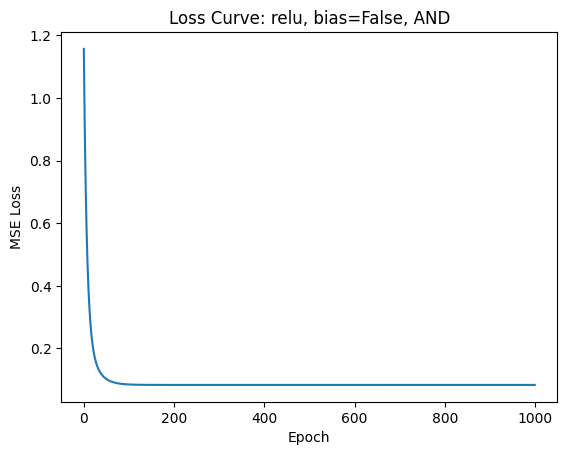

relu, bias=False, AND, Accuracy=1.00


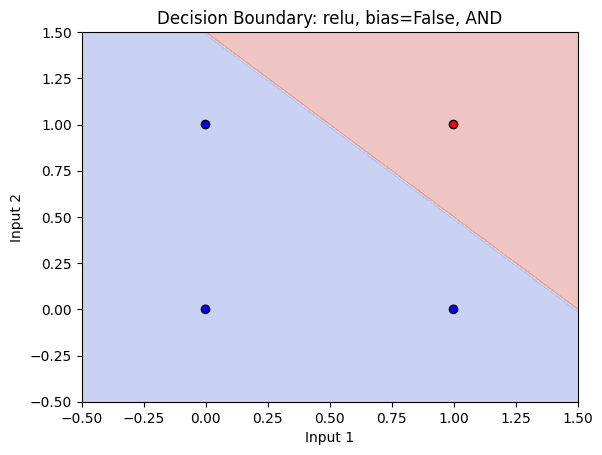

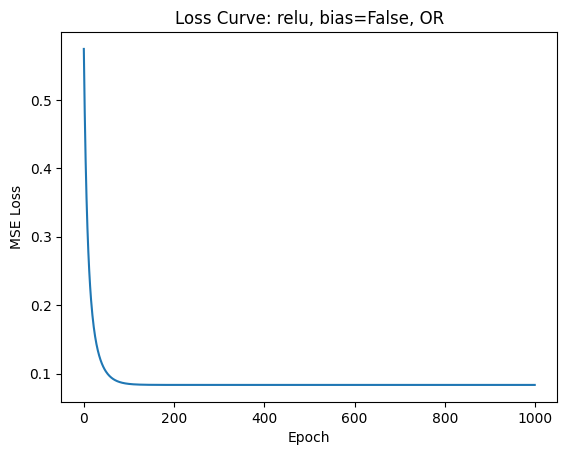

relu, bias=False, OR, Accuracy=1.00


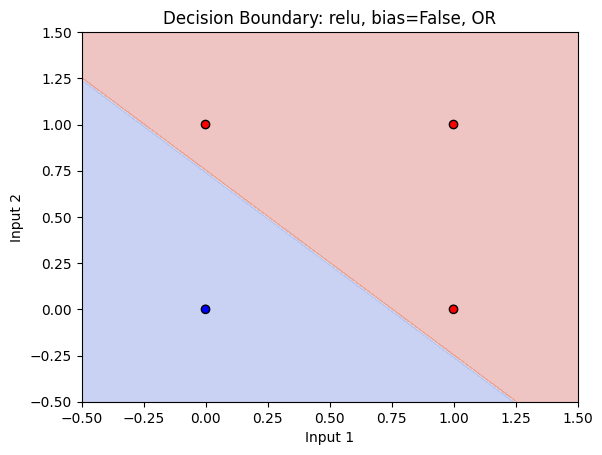

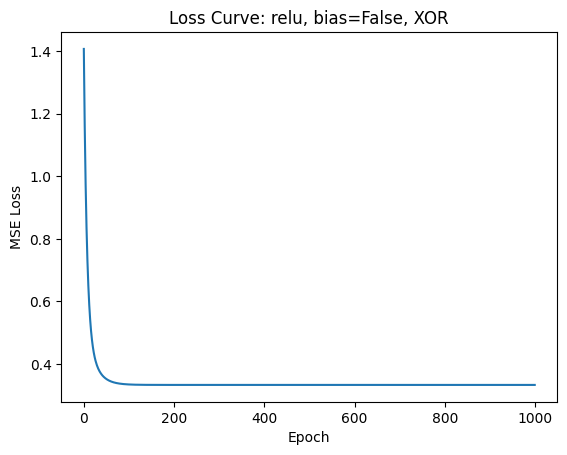

relu, bias=False, XOR, Accuracy=0.25


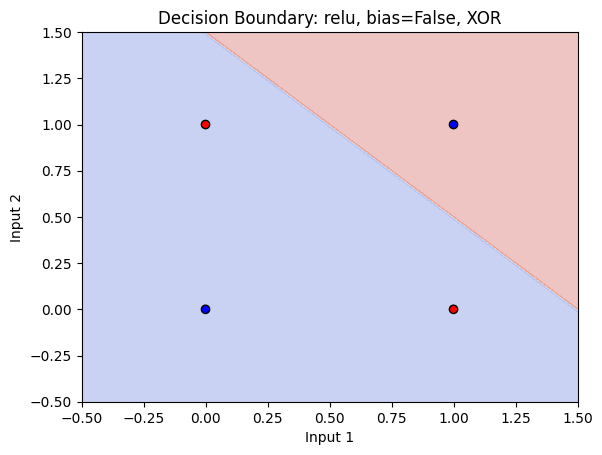

In [23]:
print("Task 1a: Single Layer Perceptron")
for act_name, (act, act_deriv) in activations.items():
    for bias in [True, False]:
        for ds_name, y in datasets.items():
            w, b, losses = train_perceptron(X, y, act, act_deriv, bias=bias)
            
            # Plot loss curve
            plt.plot(losses)
            title = f'{act_name}, bias={bias}, {ds_name}'
            plt.title(f'Loss Curve: {title}')
            plt.xlabel('Epoch')
            plt.ylabel('MSE Loss')
            plt.show()
            
            # Predictions and accuracy
            z = X @ w + b
            a = act(z)
            pred = (a > 0.5).astype(int)
            accuracy = np.mean(pred == y)
            print(f'{title}, Accuracy={accuracy:.2f}')
            
            # Plot decision boundary
            plot_decision_boundary(X, y, w, b, act, f'Decision Boundary: {title}')

In [24]:
def train_mlp_one_hidden(X, y, hidden_activation, hidden_derivative, bias=True, lr=0.1, epochs=1000, h=2):
    np.random.seed(0)
    m, n = X.shape
    o = y.shape[1] if len(y.shape) > 1 else 1
    y = y.reshape(-1, 1) if o == 1 else y
    
    # Initialize weights
    W1 = np.random.randn(n, h)
    b1 = np.random.randn(1, h) if bias else np.zeros((1, h))
    W2 = np.random.randn(h, o)
    b2 = np.random.randn(1, o) if bias else np.zeros((1, o))
    losses = []
    
    for epoch in range(epochs):
        # Forward pass
        z1 = X @ W1 + b1
        a1 = hidden_activation(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)
        
        # Binary cross-entropy loss
        loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))
        losses.append(loss)
        
        # Backpropagation
        dz2 = a2 - y
        dw2 = a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        da1 = dz2 @ W2.T
        dz1 = da1 * hidden_derivative(z1)
        dw1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights
        W1 -= lr * dw1
        if bias:
            b1 -= lr * db1
        W2 -= lr * dw2
        if bias:
            b2 -= lr * db2
    
    return W1, b1, W2, b2, losses
    

In [25]:
def plot_mlp_decision_boundary(X, y, W1, b1, W2, b2, hidden_activation, title, output_idx=0):
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = np.linspace(-0.5, 1.5, 100)
    xx1, xx2 = np.meshgrid(x1, x2)
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    
    z1 = grid @ W1 + b1
    a1 = hidden_activation(z1)
    z2 = a1 @ W2[:, [output_idx]] + b2[0, [output_idx]]
    a2 = sigmoid(z2)
    pred = (a2 > 0.5).astype(int).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, pred, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y[:,output_idx] if y.ndim > 1 else y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()


Task 1b: Backpropagation Network


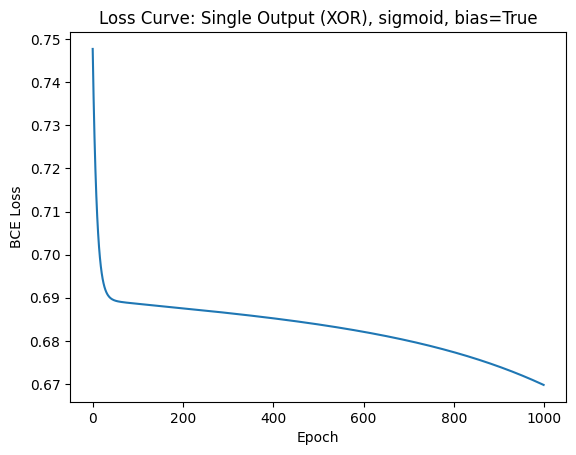

Single Output (XOR), sigmoid, bias=True, Accuracy=0.50


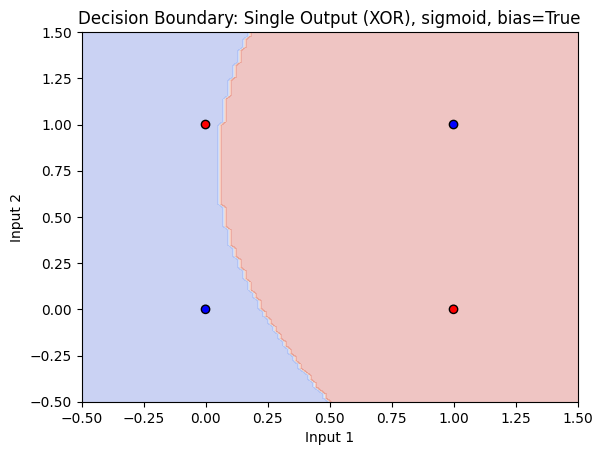

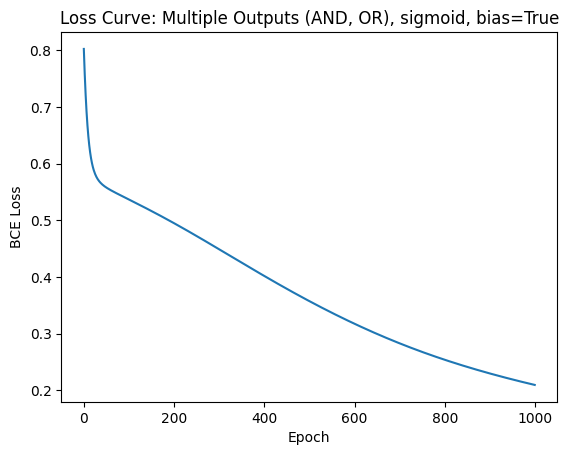

Multiple Outputs (AND, OR), sigmoid, bias=True, Accuracy=1.00


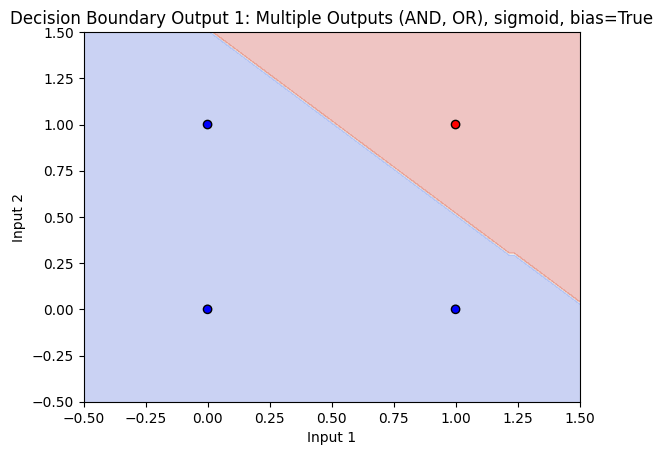

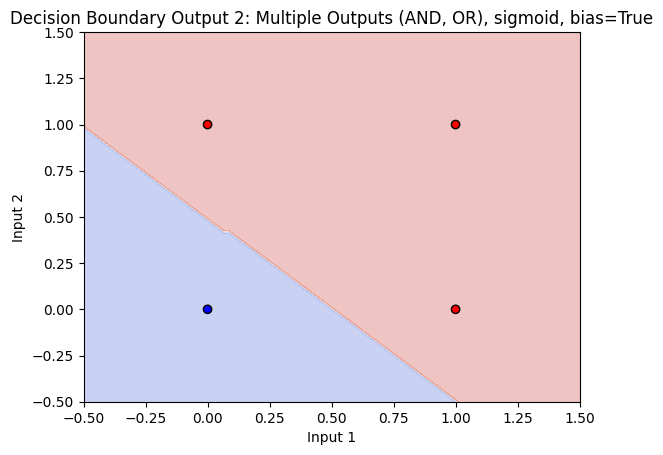

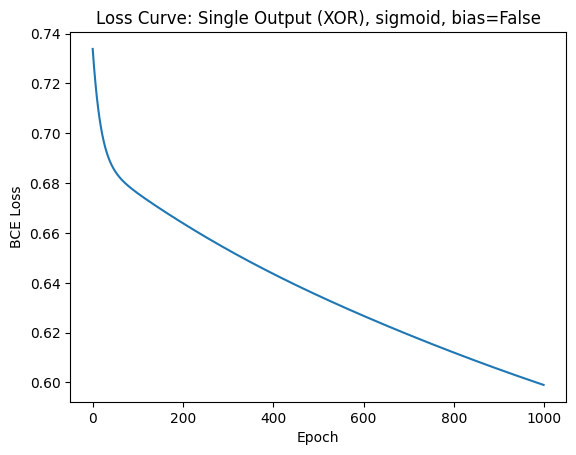

Single Output (XOR), sigmoid, bias=False, Accuracy=0.75


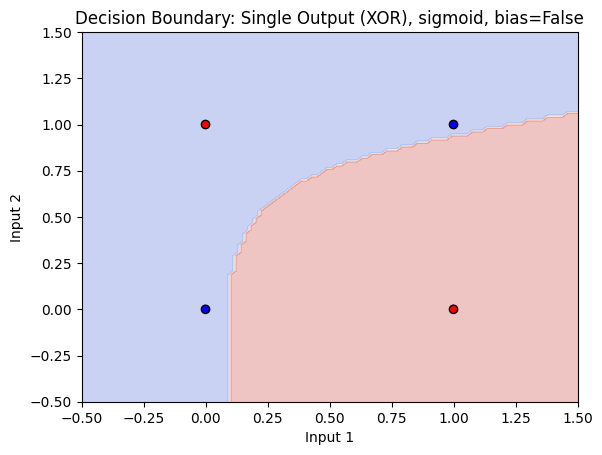

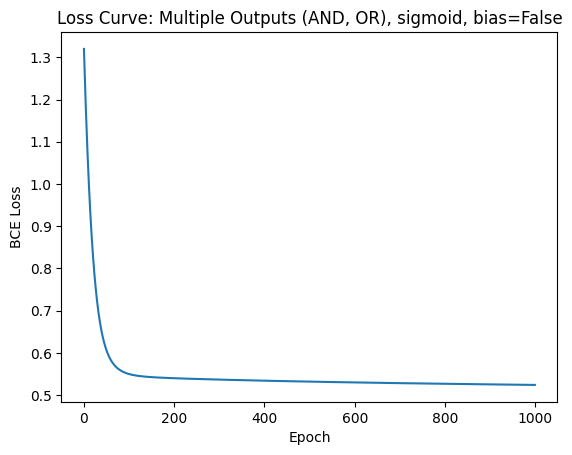

Multiple Outputs (AND, OR), sigmoid, bias=False, Accuracy=0.75


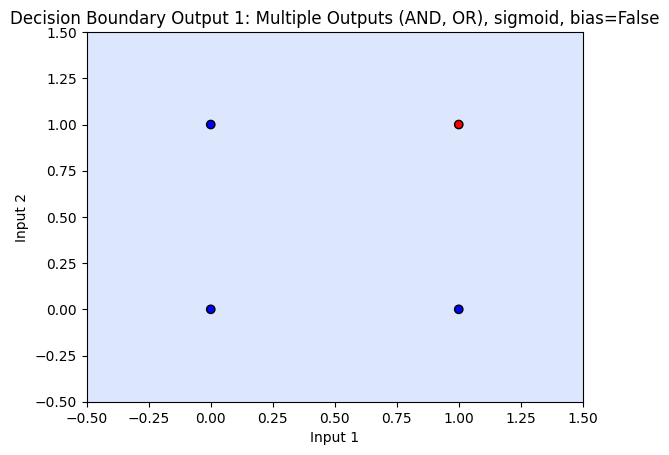

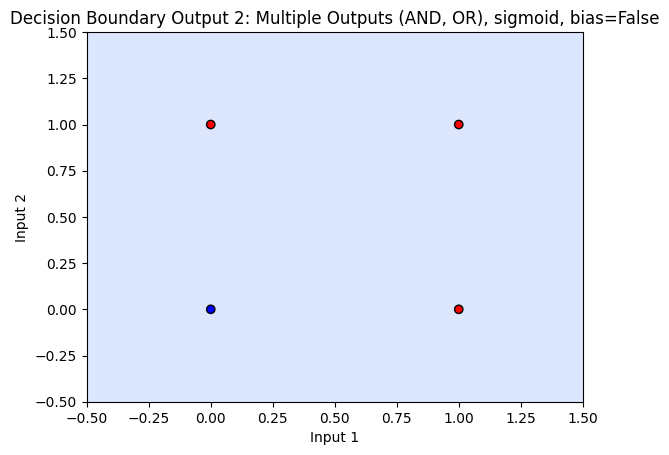

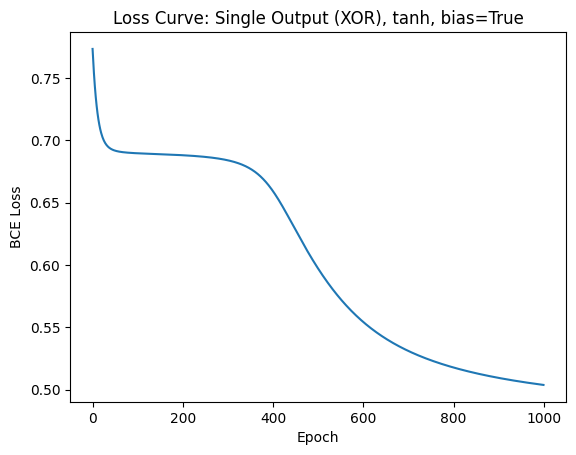

Single Output (XOR), tanh, bias=True, Accuracy=0.75


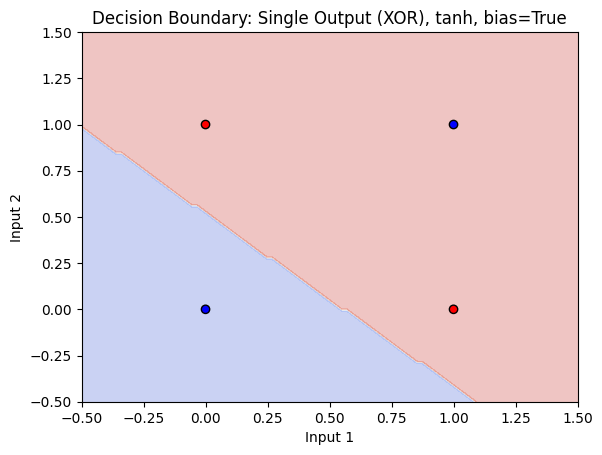

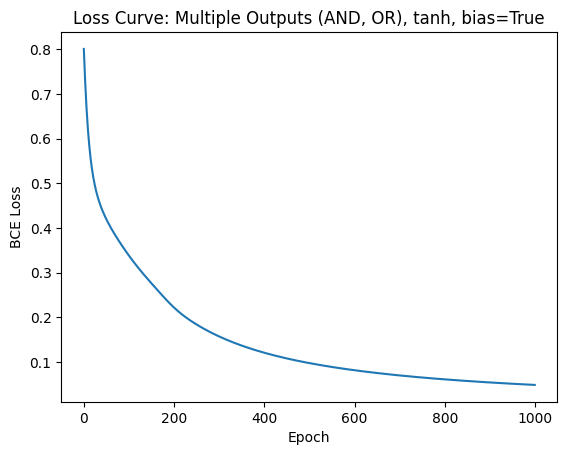

Multiple Outputs (AND, OR), tanh, bias=True, Accuracy=1.00


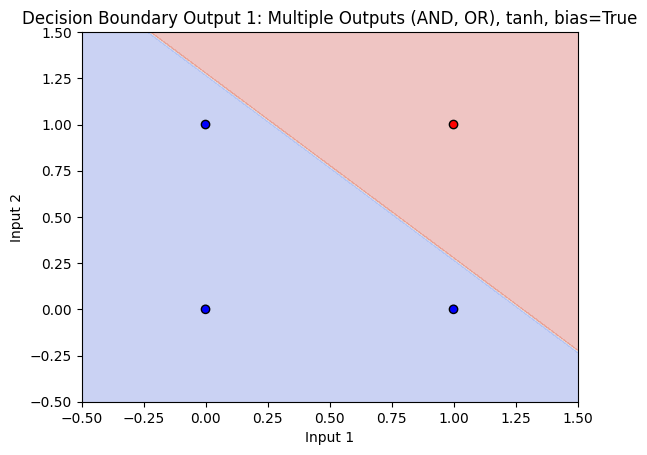

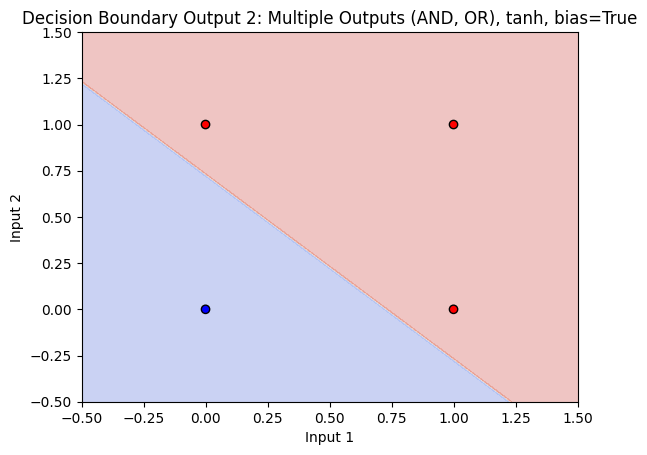

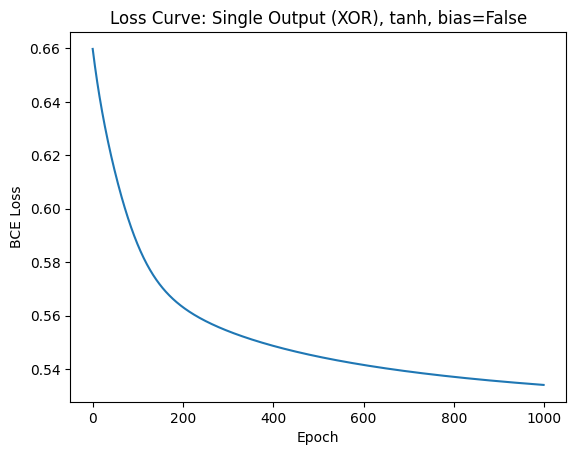

Single Output (XOR), tanh, bias=False, Accuracy=0.50


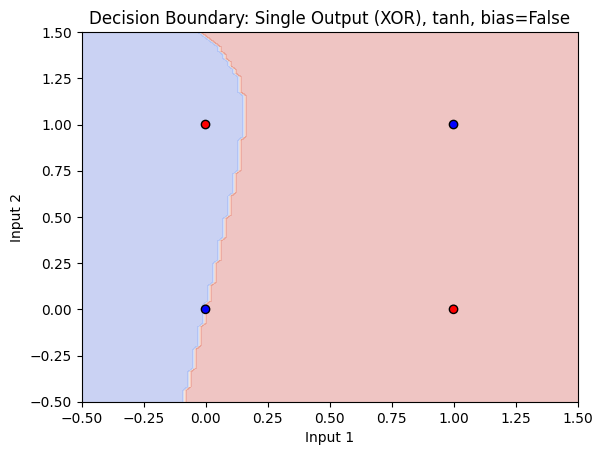

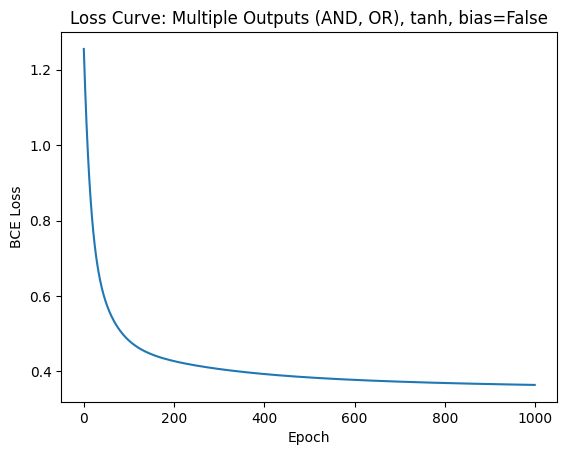

Multiple Outputs (AND, OR), tanh, bias=False, Accuracy=0.88


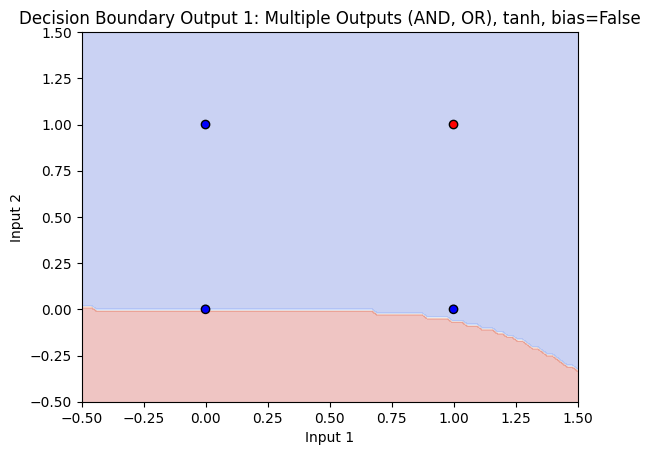

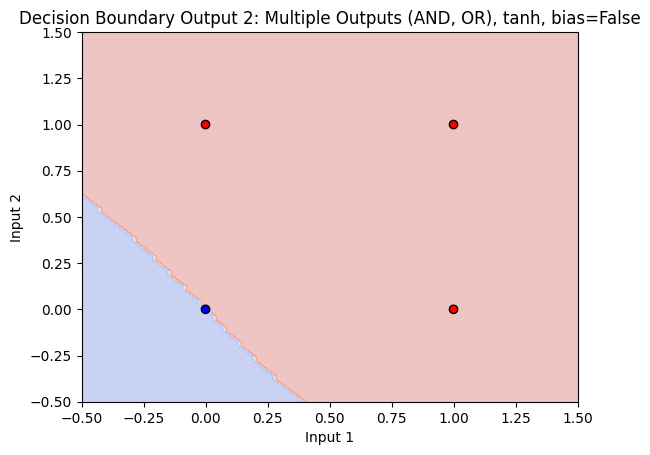

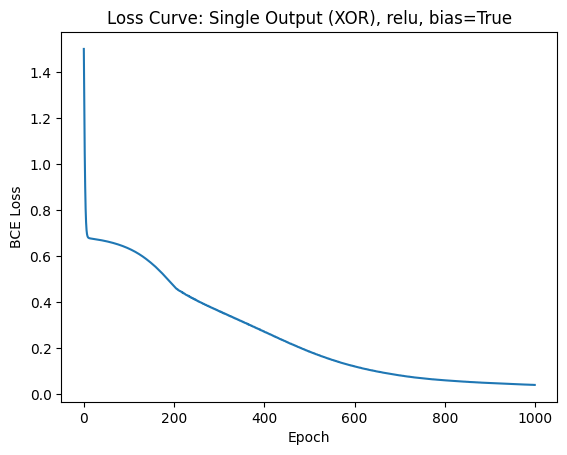

Single Output (XOR), relu, bias=True, Accuracy=1.00


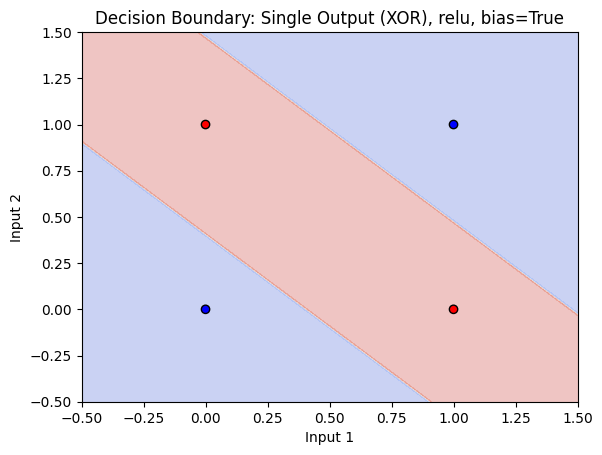

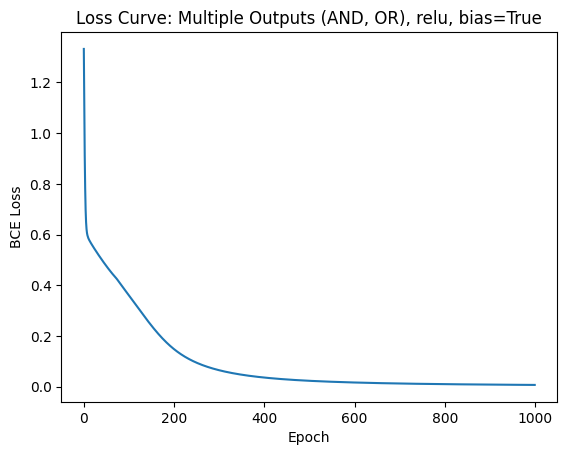

Multiple Outputs (AND, OR), relu, bias=True, Accuracy=1.00


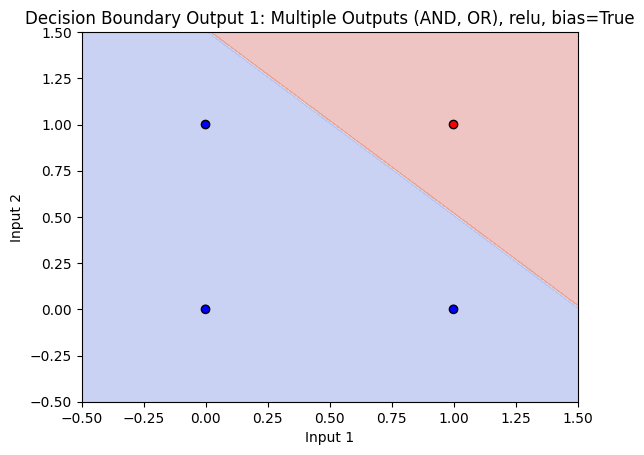

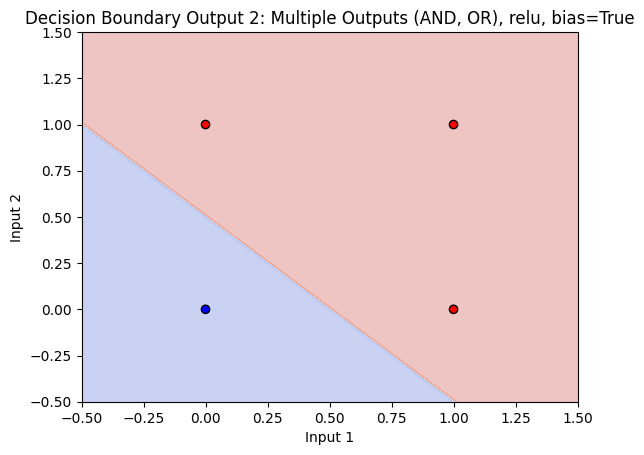

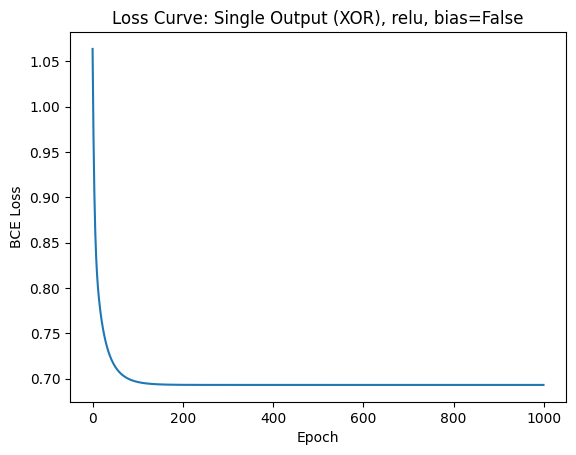

Single Output (XOR), relu, bias=False, Accuracy=0.50


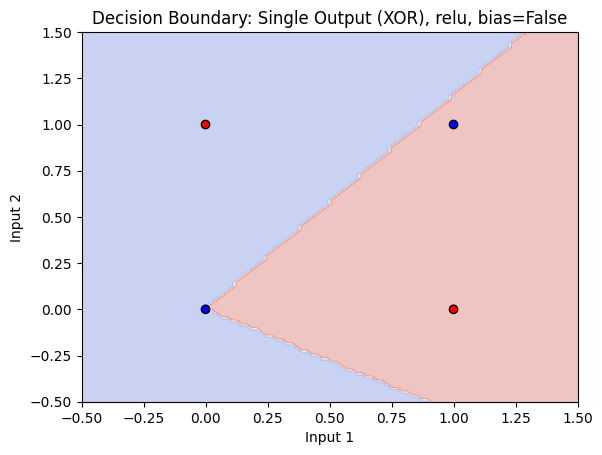

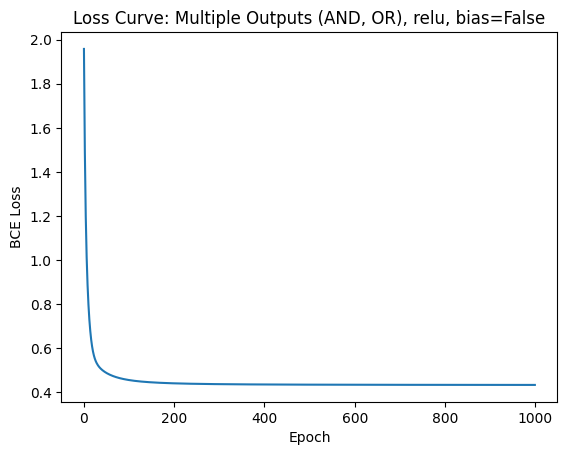

Multiple Outputs (AND, OR), relu, bias=False, Accuracy=0.88


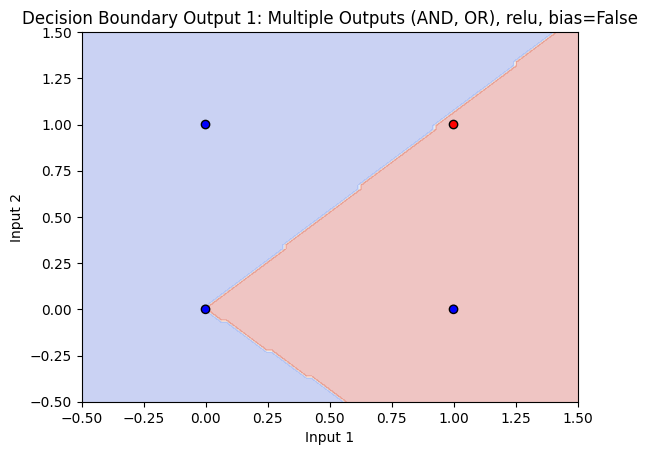

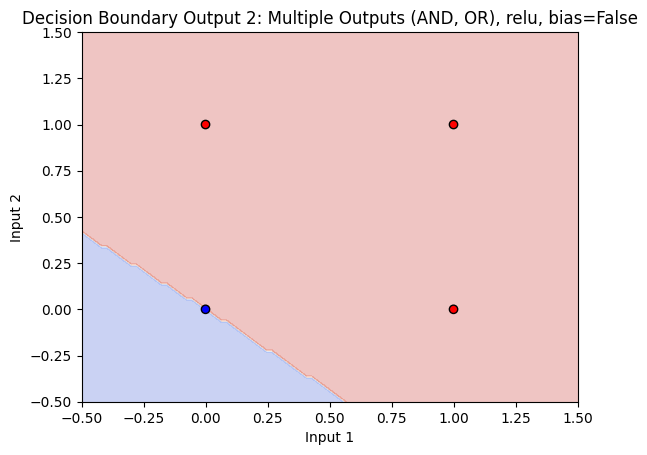

In [26]:
print("\nTask 1b: Backpropagation Network")
# Single output (XOR)
y_xor_2d = y_xor.reshape(-1, 1)
# Multiple outputs (AND, OR)
y_multi = np.array([[0,0], [0,1], [0,1], [1,1]])

for act_name, (act, act_deriv) in activations.items():
    for bias in [True, False]:
        # Single output: XOR (non-linear)
        W1, b1, W2, b2, losses = train_mlp_one_hidden(X, y_xor_2d, act, act_deriv, bias=bias)
        plt.plot(losses)
        title = f'Single Output (XOR), {act_name}, bias={bias}'
        plt.title(f'Loss Curve: {title}')
        plt.xlabel('Epoch')
        plt.ylabel('BCE Loss')
        plt.show()
        
        # Evaluate
        a1 = act(X @ W1 + b1)
        a2 = sigmoid(a1 @ W2 + b2)
        pred = (a2 > 0.5).astype(int)
        accuracy = np.mean(pred.flatten() == y_xor)
        print(f'{title}, Accuracy={accuracy:.2f}')
        plot_mlp_decision_boundary(X, y_xor_2d, W1, b1, W2, b2, act, f'Decision Boundary: {title}')
        
        # Multiple outputs: [AND, OR]
        W1, b1, W2, b2, losses = train_mlp_one_hidden(X, y_multi, act, act_deriv, bias=bias)
        plt.plot(losses)
        title = f'Multiple Outputs (AND, OR), {act_name}, bias={bias}'
        plt.title(f'Loss Curve: {title}')
        plt.xlabel('Epoch')
        plt.ylabel('BCE Loss')
        plt.show()
        
        # Evaluate
        a1 = act(X @ W1 + b1)
        a2 = sigmoid(a1 @ W2 + b2)
        pred = (a2 > 0.5).astype(int)
        accuracy = np.mean(pred == y_multi)
        print(f'{title}, Accuracy={accuracy:.2f}')
        for k in range(2):
            plot_mlp_decision_boundary(X, y_multi, W1, b1, W2, b2, act, 
                                       f'Decision Boundary Output {k+1}: {title}', k)

In [27]:
def train_mlp_two_hidden(X, y, hidden_act1, hidden_deriv1, hidden_act2, hidden_deriv2, bias=True, lr=0.1, epochs=1000, h1=2, h2=2):
    np.random.seed(0)
    m, n = X.shape
    o = y.shape[1]
    
    # Initialize weights
    W1 = np.random.randn(n, h1)
    b1 = np.random.randn(1, h1) if bias else np.zeros((1, h1))
    W2 = np.random.randn(h1, h2)
    b2 = np.random.randn(1, h2) if bias else np.zeros((1, h2))
    W3 = np.random.randn(h2, o)
    b3 = np.random.randn(1, o) if bias else np.zeros((1, o))
    losses = []
    
    for epoch in range(epochs):
        # Forward pass
        z1 = X @ W1 + b1
        a1 = hidden_act1(z1)
        z2 = a1 @ W2 + b2
        a2 = hidden_act2(z2)
        z3 = a2 @ W3 + b3
        a3 = sigmoid(z3)
        
        # Binary cross-entropy loss
        loss = -np.mean(y * np.log(a3 + 1e-8) + (1 - y) * np.log(1 - a3 + 1e-8))
        losses.append(loss)
        
        # Backpropagation
        dz3 = a3 - y
        dw3 = a2.T @ dz3 / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        da2 = dz3 @ W3.T
        dz2 = da2 * hidden_deriv2(z2)
        dw2 = a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        da1 = dz2 @ W2.T
        dz1 = da1 * hidden_deriv1(z1)
        dw1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights
        W1 -= lr * dw1
        if bias:
            b1 -= lr * db1
        W2 -= lr * dw2
        if bias:
            b2 -= lr * db2
        W3 -= lr * dw3
        if bias:
            b3 -= lr * db3
    
    return W1, b1, W2, b2, W3, b3, losses


Task 1c: Multi-Layer Perceptron with Multiple Outputs


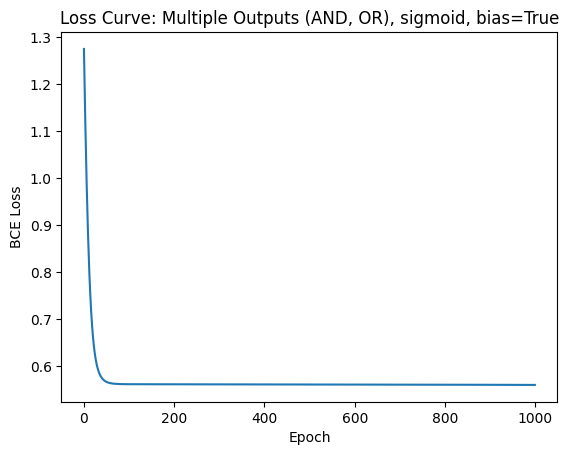

Multiple Outputs (AND, OR), sigmoid, bias=True, Accuracy=0.75


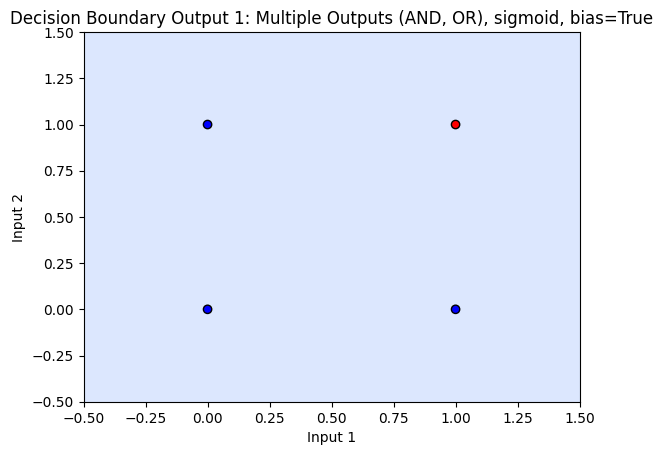

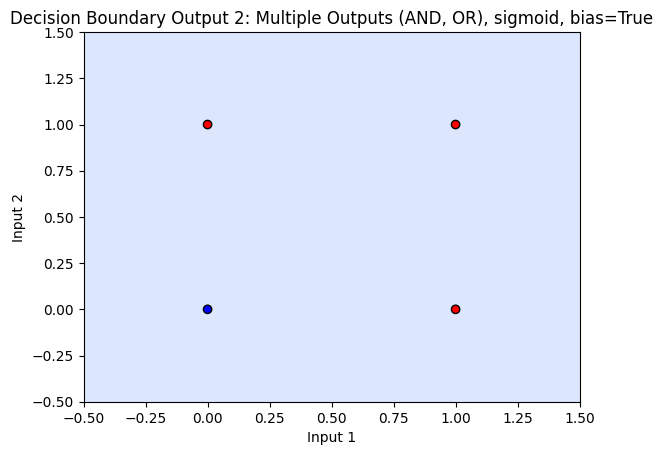

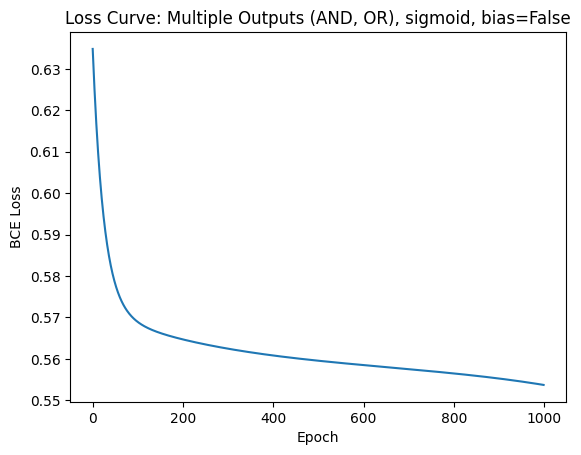

Multiple Outputs (AND, OR), sigmoid, bias=False, Accuracy=0.75


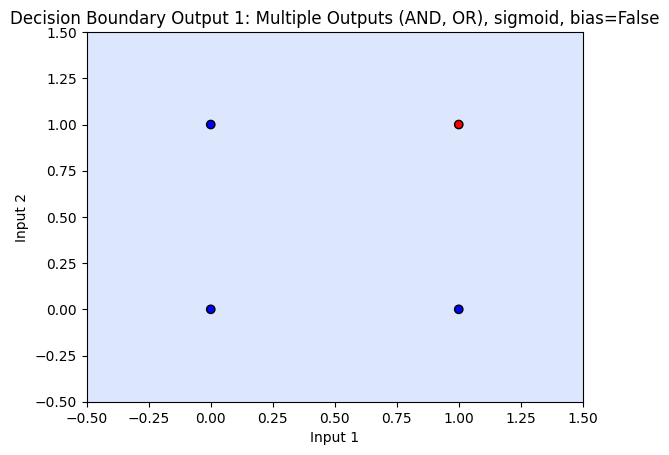

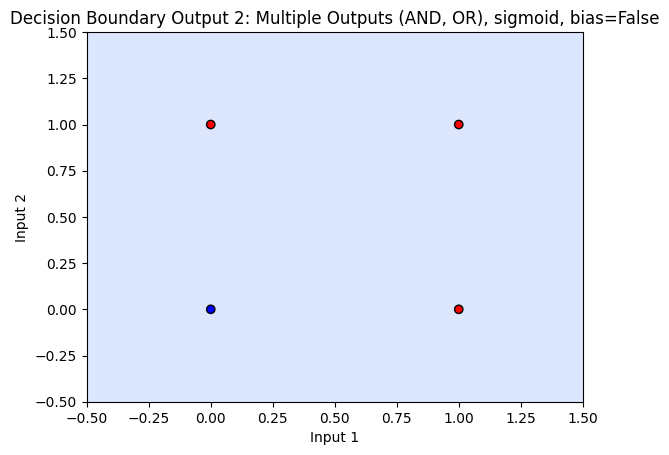

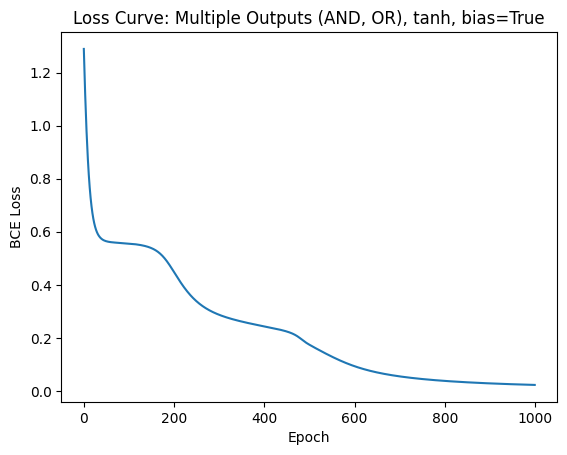

Multiple Outputs (AND, OR), tanh, bias=True, Accuracy=1.00


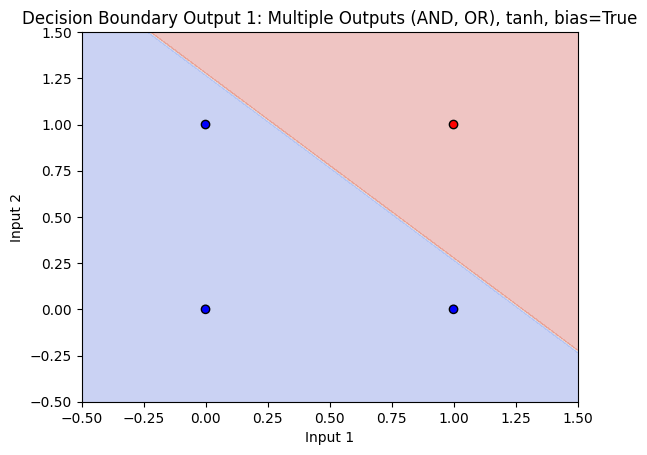

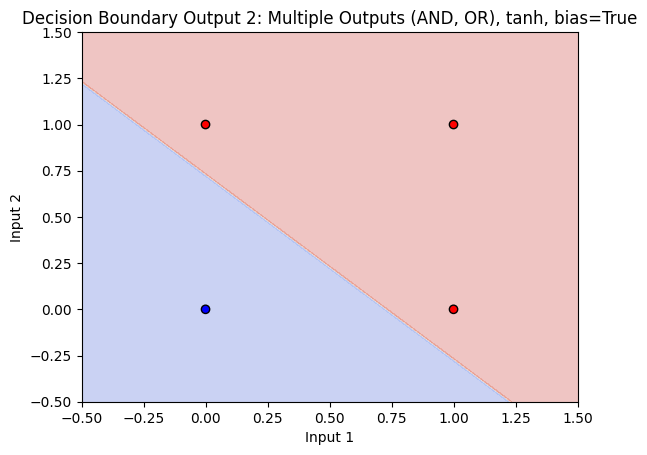

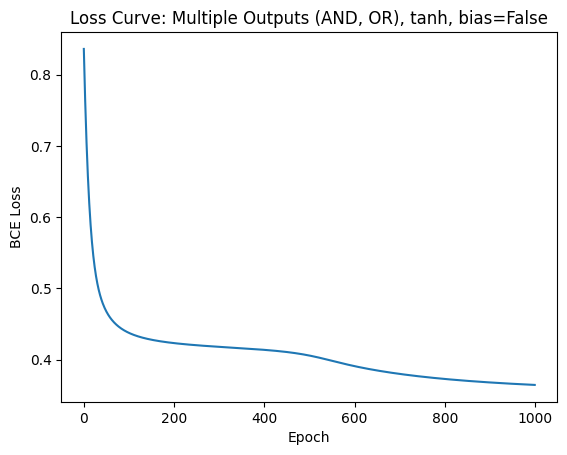

Multiple Outputs (AND, OR), tanh, bias=False, Accuracy=0.88


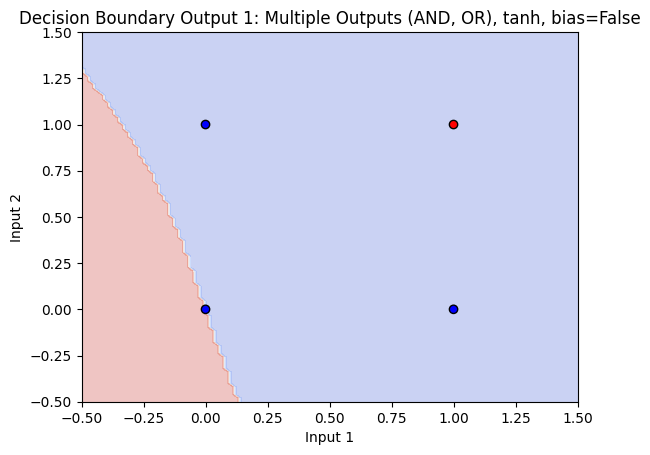

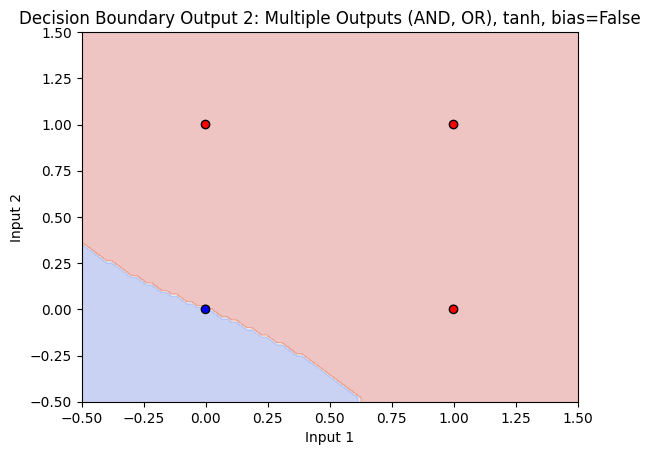

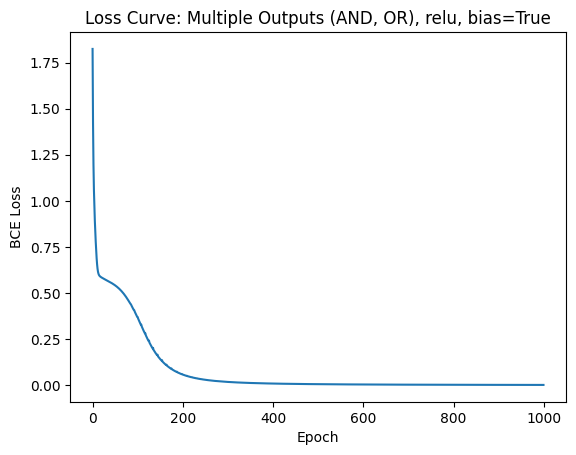

Multiple Outputs (AND, OR), relu, bias=True, Accuracy=1.00


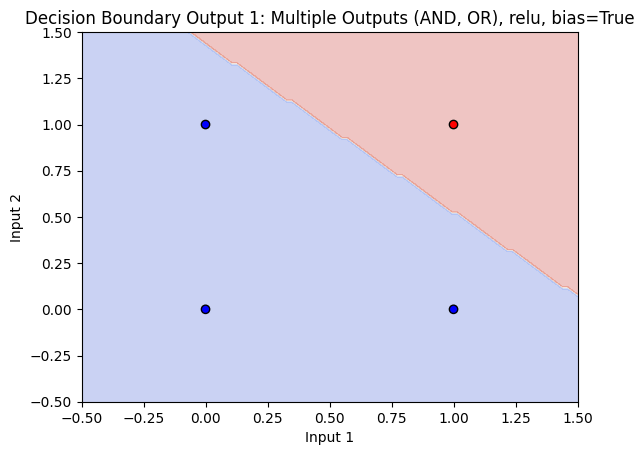

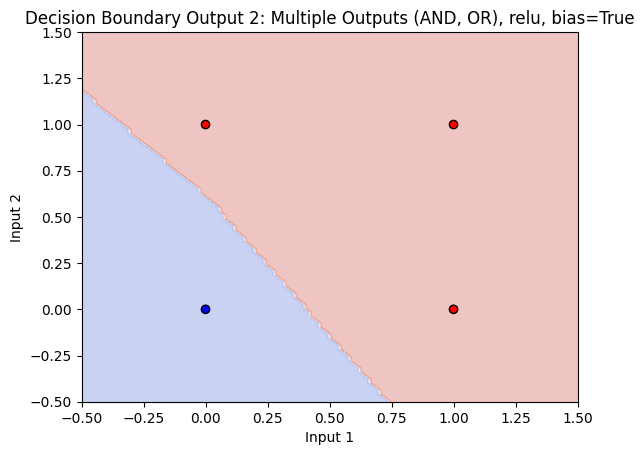

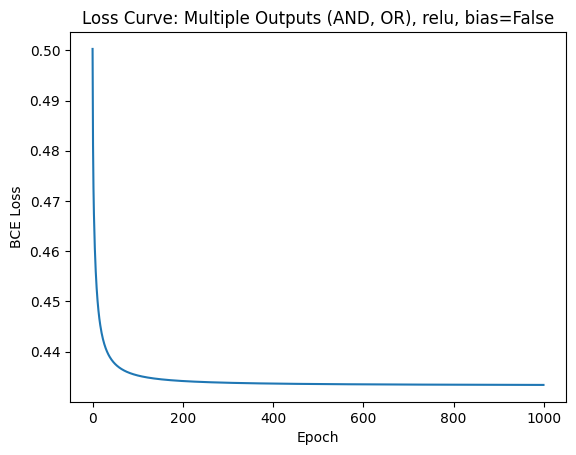

Multiple Outputs (AND, OR), relu, bias=False, Accuracy=0.88


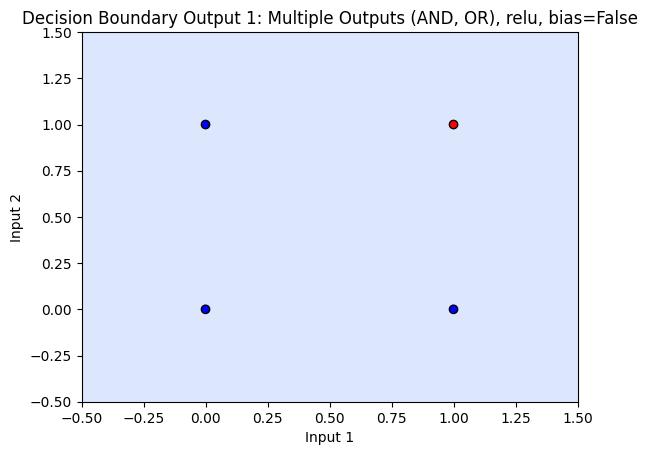

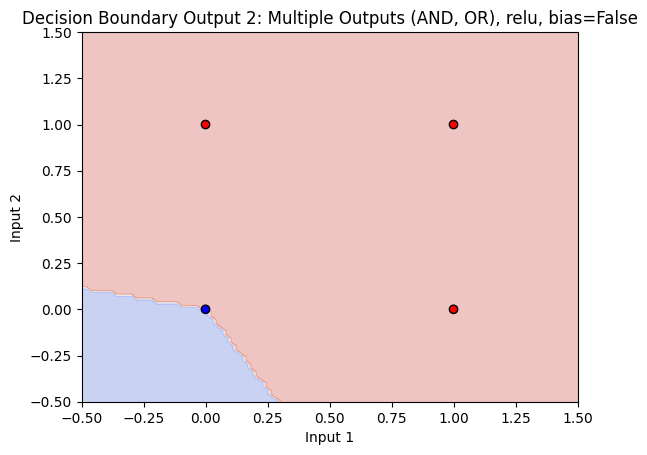

In [28]:
print("\nTask 1c: Multi-Layer Perceptron with Multiple Outputs")
for act_name, (act, act_deriv) in activations.items():
    for bias in [True, False]:
        W1, b1, W2, b2, W3, b3, losses = train_mlp_two_hidden(X, y_multi, act, act_deriv, act, act_deriv, bias=bias)
        
        # Plot loss curve
        plt.plot(losses)
        title = f'Multiple Outputs (AND, OR), {act_name}, bias={bias}'
        plt.title(f'Loss Curve: {title}')
        plt.xlabel('Epoch')
        plt.ylabel('BCE Loss')
        plt.show()
        
        # Evaluate
        a1 = act(X @ W1 + b1)
        a2 = act(a1 @ W2 + b2)
        a3 = sigmoid(a2 @ W3 + b3)
        pred = (a3 > 0.5).astype(int)
        accuracy = np.mean(pred == y_multi)
        print(f'{title}, Accuracy={accuracy:.2f}')
        
        # Plot decision boundaries for each output
        for k in range(2):
            x1 = np.linspace(-0.5, 1.5, 100)
            x2 = np.linspace(-0.5, 1.5, 100)
            xx1, xx2 = np.meshgrid(x1, x2)
            grid = np.c_[xx1.ravel(), xx2.ravel()]
            
            z1 = grid @ W1 + b1
            a1 = act(z1)
            z2 = a1 @ W2 + b2
            a2 = act(z2)
            z3 = a2 @ W3[:, [k]] + b3[0, [k]]
            a3 = sigmoid(z3)
            pred = (a3 > 0.5).astype(int).reshape(xx1.shape)
            
            plt.contourf(xx1, xx2, pred, alpha=0.3, cmap='coolwarm')
            plt.scatter(X[:,0], X[:,1], c=y_multi[:,k], cmap='bwr', edgecolors='k')
            plt.title(f'Decision Boundary Output {k+1}: {title}')
            plt.xlabel('Input 1')
            plt.ylabel('Input 2')
            plt.show()

### Task 2 Handwriting Recognition with CNN

In [30]:
!uv pip install kaggle tensorflow

Resolved 45 packages in 42ms                                         
Building kaggle==1.6.17                                                
Building kaggle==1.6.17                                        
Building kaggle==1.6.17                                        
⠹ Preparing packages... (0/10)
Building kaggle==1.6.17-     0 B/1.24 MiB                      
⠹ Preparing packages... (0/10)
setuptools ------------------------------     0 B/1.17 MiB
Building kaggle==1.6.17-     0 B/1.24 MiB                      
⠹ Preparing packages... (0/10)
setuptools ------------------------------     0 B/1.17 MiB
Building kaggle==1.6.17- 16.00 KiB/1.24 MiB                    
⠹ Preparing packages... (0/10)
setuptools ------------------------------ 14.88 KiB/1.17 MiB
Building kaggle==1.6.17- 16.00 KiB/1.24 MiB                    
⠹ Preparing packages... (0/10)
setuptools ------------------------------ 14.88 KiB/1.17 MiB
Building kaggle==1.6.17- 32.00 KiB/1.24 MiB                    
⠹ Preparing pac

In [35]:
!kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [39]:
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [41]:
train = pd.read_csv('train.csv')
y = train['label'].values
X = train.drop('label', axis=1).values / 255.0  # Normalize pixel values
X = X.reshape(-1, 28, 28, 1)  # Reshape to (samples, height, width, channels)

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9883 - val_loss: 0.0440
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9967 - loss: 0.0090 - val_accuracy: 0.9880 - val_loss: 0.0417
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9979 - loss: 0.0068 - val_accuracy: 0.9896 - val_loss: 0.0411
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9971 - loss: 0.0076 - val_accuracy: 0.9896 - val_loss: 0.0401
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9855 - val_loss: 0.0612
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9870 - val_loss: 0.0599
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9880 - val_loss: 0.0519
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9982 - loss: 0.0056 - 

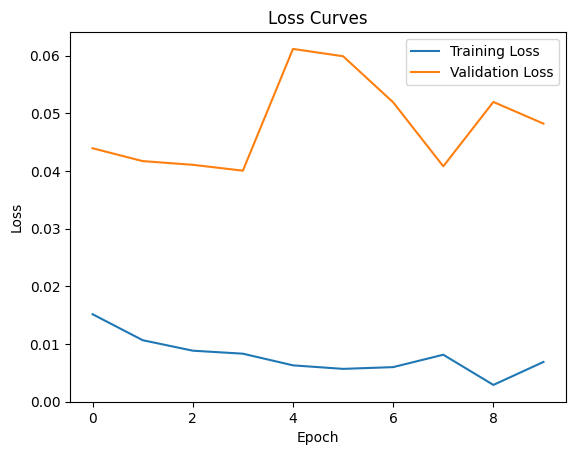

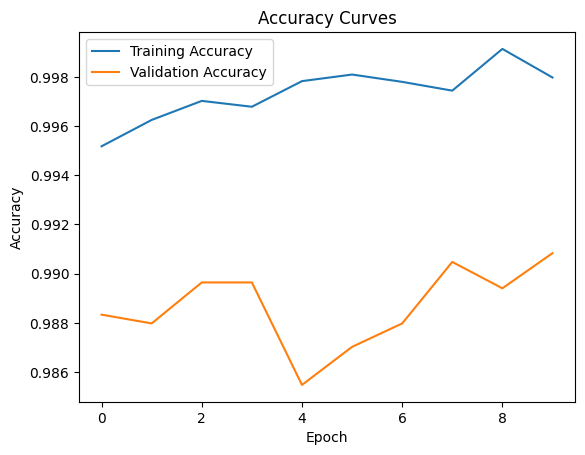

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
test = pd.read_csv('test.csv')
X_test = test.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


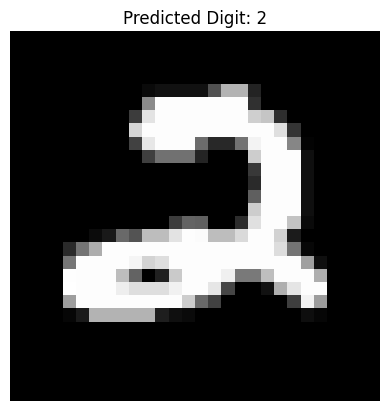

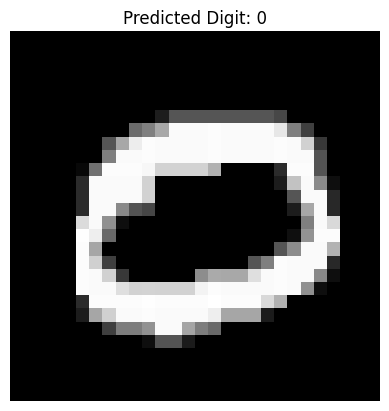

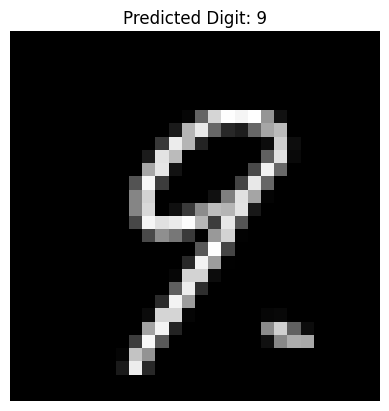

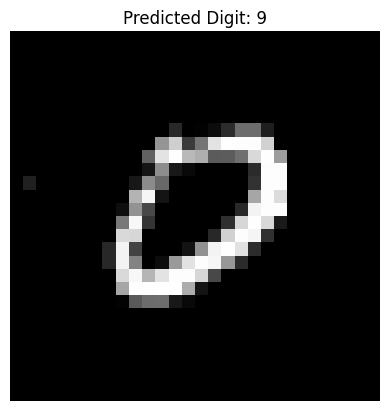

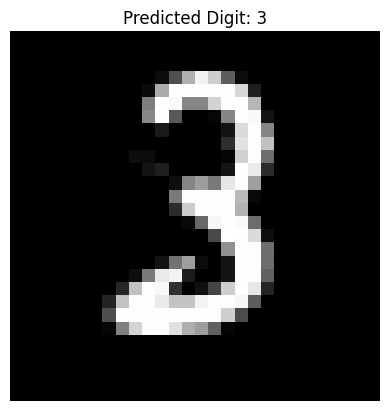

In [49]:
for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f'Predicted Digit: {pred_labels[i]}')
    plt.axis('off')
    plt.show()